<h1><center>Анализ поведения клиентов сети фитнес-центров</center></h1> 

## Введение
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

***Цель работы:***
* Спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* Сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами

***Описание данных:***
* Churn — факт оттока в текущем месяце;


* gender — пол
* Near_Location — проживание или работа в районе, где находится фитнес-центр
* Partner — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент в таком случае фитнес-центр хранит информацию о работодателе клиента)
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
* Phone — наличие контактного телефона
* Age — возраст
* Lifetime — время с момента первого обращения в фитнес-центр (в месяцах)


* Contract_period — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
* Month_to_end_contract — срок до окончания текущего действующего абонемента (в месяцах)
* Group_visits — факт посещения групповых занятий
* Avg_class_frequency_total — средняя частота посещений в неделю за все время с начала действия абонемента
* Avg_class_frequency_current_month — средняя частота посещений в неделю за предыдущий месяц
* Avg_additional_charges_total — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

## Подготовка данных к анализу

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import math 
import numpy as np

# Граф-е библ-и
import seaborn as sns
import matplotlib.pyplot as plt
# Библ-и ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Метрики
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import silhouette_score
# Дендрограмма
from scipy.cluster.hierarchy import dendrogram, linkage

# Отключ. предупреждений
import warnings
warnings.filterwarnings("ignore")

In [2]:
# прочитаем файл
df = pd.read_csv('/datasets/gym_churn.csv')
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


В датафрейме 4000 строк и 14 признаков

In [3]:
# Для удобства приведем все названия к нижнему регистру
df.columns = [i.lower() for i in df]
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

1. 'churn'- факт оттока в текущем месяце, в дальнейшей работе будет нашей целевой переменной. Это бинарная переменная (1 отток был, 0 – не было)
2. 'gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits' - бинарные переменные



In [5]:
# Посмотрим общ-ю инф-ю
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Пропусков в данных нет

In [6]:
# проверим наличие в данных дубликатов
df.duplicated().value_counts()

False    4000
dtype: int64

Полных дубликатов нет. В данных нет id пользователей, поэтому будем считать, что каждая строка – относится к одному уникальному польз-ю

In [7]:
# Посмотрим сбалансированность значений целевого признака
df.churn.value_counts() / len(df)

0    0.73475
1    0.26525
Name: churn, dtype: float64

Данные разбалансированы,это нужно будет учесть при постоении моделей

In [8]:
# Посмотрим описат. стат-ку
df.describe(include='all')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


1.	Визуальный анализ описат. статистики не выявил аномалий в значениях
2.	Распределение значений столбцов avg_additional_charges_total, avg_class_frequency_total, avg_class_frequency_current_month, lifetime   имеют тяжелый правый хвост (в данных есть выбросы)


### Вывод
1. Пропусков в данных нет
2. Полных дубликатов нет
3. Данные разбалансированы

## Исследовательский анализ данных (EDA)


Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался 

Напишем функцию, которая «подсвечивала» бы минимальные значения. Причем, если различие между признаками более порогового (в нашем случае 30 %) – цвет минимального значения красный, если разница меньше - зеленый 

In [9]:
# Напишем фун-ию подсветки мин. значений
def highlight_min(values, threshold):
    is_min = values.min()
    if values[0]/values[1] > 1: # Этот блок условий определяет, что брать в кач-ве числителя и знаменателя для вычисления 
                                # относит. отличия величин
        if (values[0] - values[1]) /values[0] > threshold:# Пороговое значение
            return ['background-color: red' if i == is_min else '' for i in values]
        else: 
            return ['background-color: lightgreen' if i == is_min else '' for i in values]
    elif values[0]/values[1] == 1:
        return ['background-color: lightgreen' if i == is_min else '' for i in values]
    else:
        if (values[1] - values[0])/values[1] > threshold:
            return ['background-color: red' if i == is_min else '' for i in values]
        else:
            return ['background-color: lightgreen' if i == is_min else '' for i in values]
   



In [10]:
# Группир. данные по churn, агрегируем средние знач-я, транспонируем, для удобства чтения и применяем нашу функ-ю построчно 
df.groupby('churn').agg('mean').T.style.apply(highlight_min,threshold=0.3, axis = 1)

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.74719,1.72856
group_visits,0.464103,0.268615
age,29.9765,26.9896
avg_additional_charges_total,158.446,115.083
month_to_end_contract,5.28309,1.66258


В среднем у клиентов в оттоке наблюдается меньшая активность (promo_friends, group_visits, avg_class_frequency_current_month), меньшее время с момента первого обращения (lifetime) и период контракта (contract_period)


Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
 

In [4]:
# Для удобства дальн. работы выделим два датасета по значению целевой переменной
gone = df.query('churn == 1')
stayed = df.query('churn != 1')

In [12]:
df

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [13]:
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

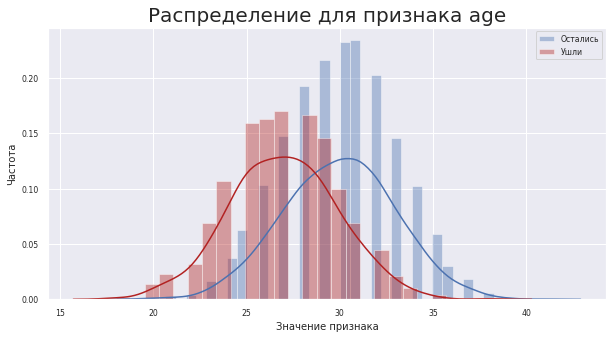

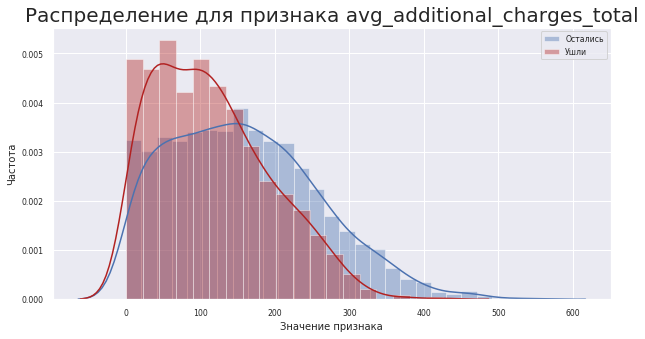

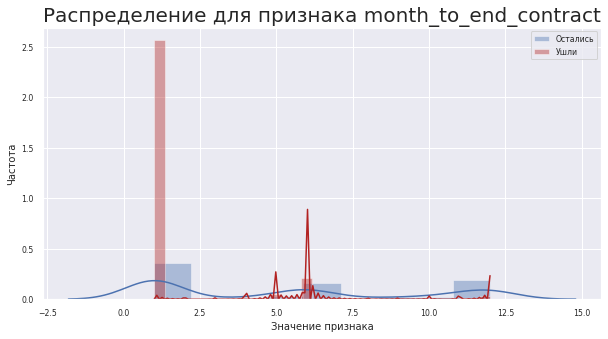

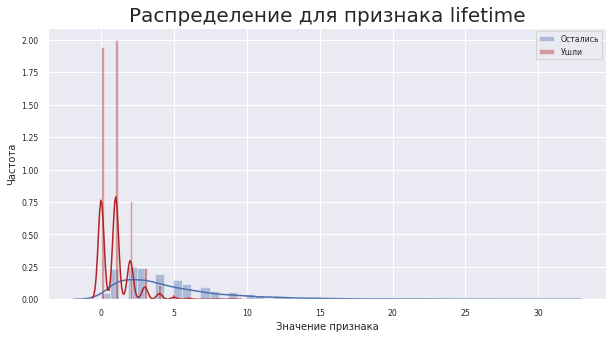

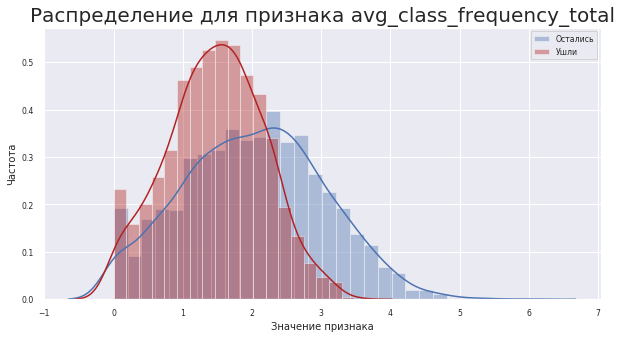

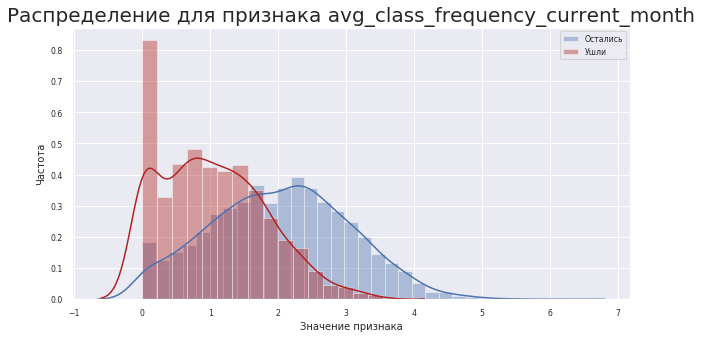

In [14]:
# Зададим граф. тему графиков
sns.set(font_scale=0.7)
# В цикле будем перебирать непрерывные признаки
for col in ['age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(10, 5))# Зададим размер графиков
    sns.distplot(stayed[col])# Остался
    sns.distplot(gone[col],  color = 'firebrick')# отток, и задали другой цвет
    # Оформление
    plt.legend(labels = ('Остались', 'Ушли'))
    
    plt.title('Распределение для признака ' + col,fontsize=20)
    plt.xlabel('Значение признака', fontsize=10),
    plt.ylabel('Частота', fontsize=10)
    plt.show()


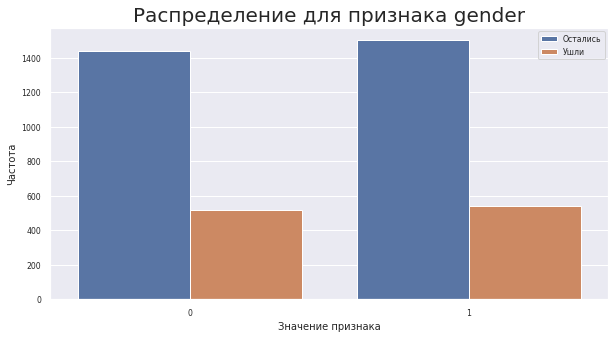

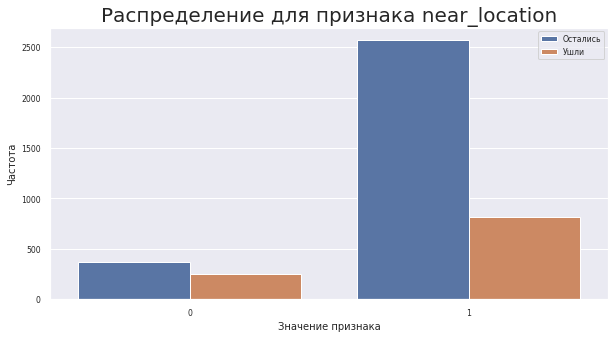

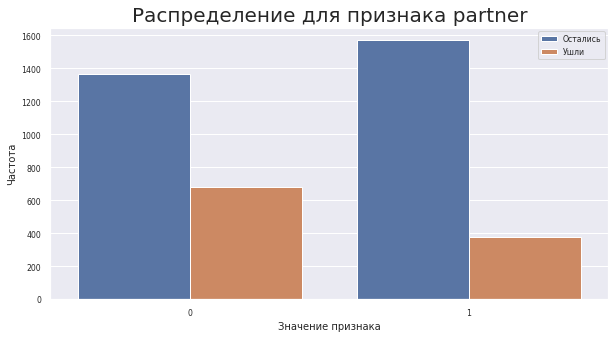

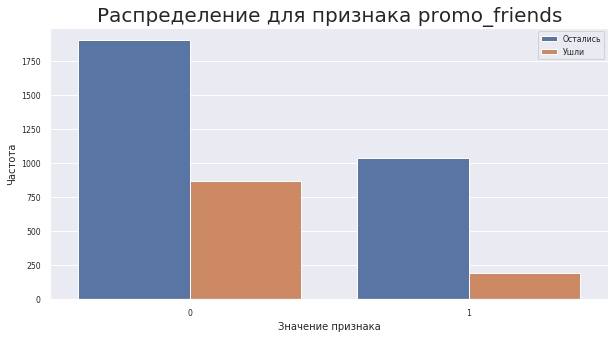

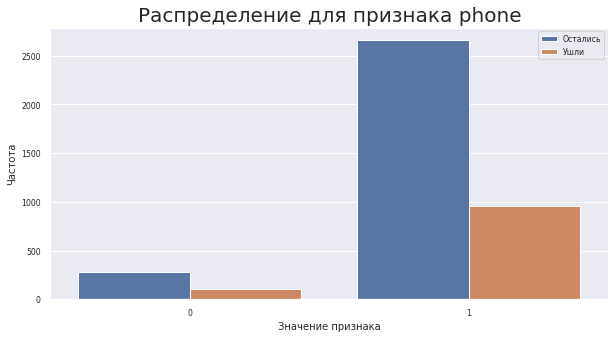

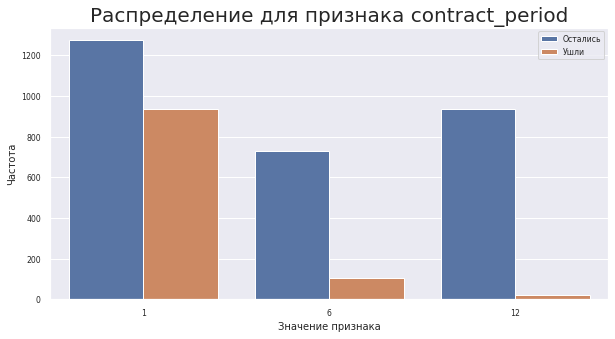

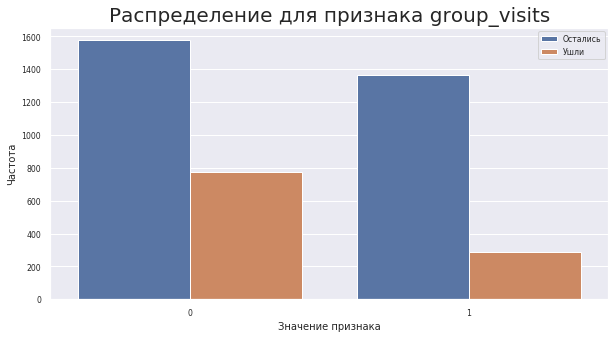

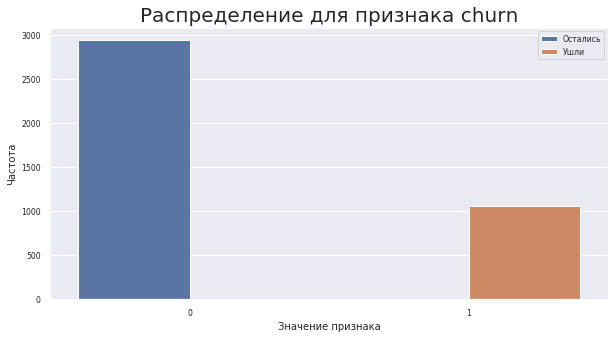

In [15]:
# Зададим граф. тему графиков
sns.set(font_scale=0.7)
# В цикле будем перебирать дискретные признаки
for col in ['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'churn']:
    plt.figure(figsize=(10, 5))# Зададим размер графиков
    
    sns.countplot(x = df[col], hue='churn', data=df)
    # Оформление
    plt.legend(labels = ('Остались', 'Ушли'))
    
    plt.title('Распределение для признака ' + col,fontsize=20)
    plt.xlabel('Значение признака', fontsize=10),
    plt.ylabel('Частота', fontsize=10)
    plt.show()

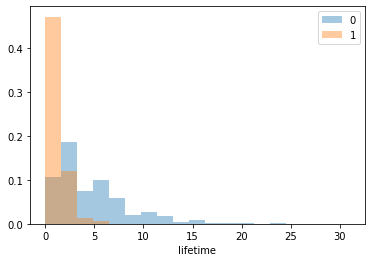

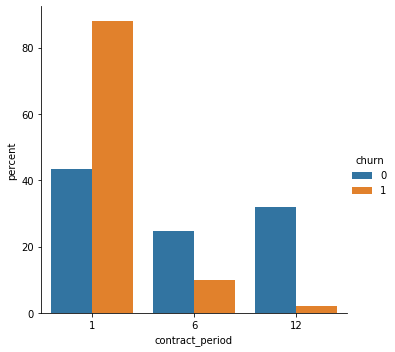

In [19]:
# Гистограммы плотностей распределений
column = 'lifetime'

min_value = min(df[column])
max_value = max(df[column])
bins_range = np.linspace(min_value, max_value, 20) # список границ столбиков гистограмм

# суммарная площадь столбиков в каждой из групп равна 1
sns.distplot(stayed[column], kde=False, norm_hist=True, bins = bins_range, label='0')
sns.distplot(gone[column], kde=False, norm_hist=True, bins = bins_range, label='1')
plt.legend()    


# Countplot с нормировкой

column = 'contract_period'
(df
.groupby('churn')[column]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=column,y='percent',hue='churn',kind='bar'))

1. Пол, локация, оставил ли клиент свой контактный телефон - на факт оттока особо не влияет

2. Можно предположить, что сотрудники компании-партнёра клуба, а также клиенты, которые привели друга, посетители групповых занятий остаются с большей вероятностью

3. Также можно предположить, что более молодые клиенты, клиенты тратящие меньшее кол-во денег на доп. услуги, уйдут с большей вероятностью

4. Клиенты в оттоке, в основном, покупают абономент на один месяц, а также посещают зал от 1 до 2 раз в неделю


Посмотрим на boxplot тех признаков, в которых мы предположили, что есть выбросы: avg_additional_charges_total, avg_class_frequency_total, avg_class_frequency_current_month, lifetime


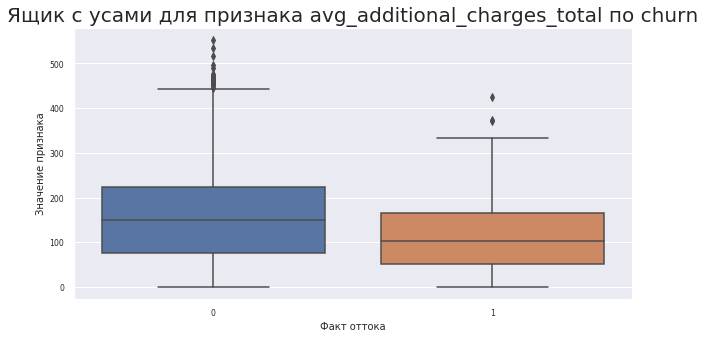

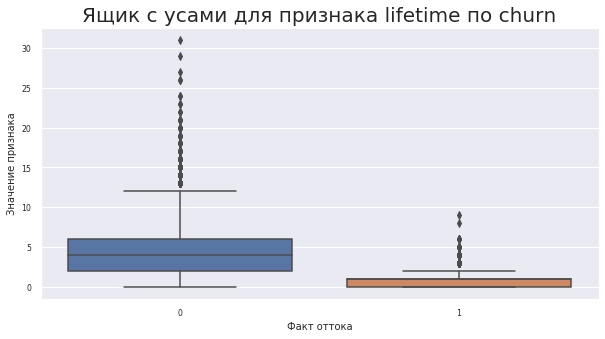

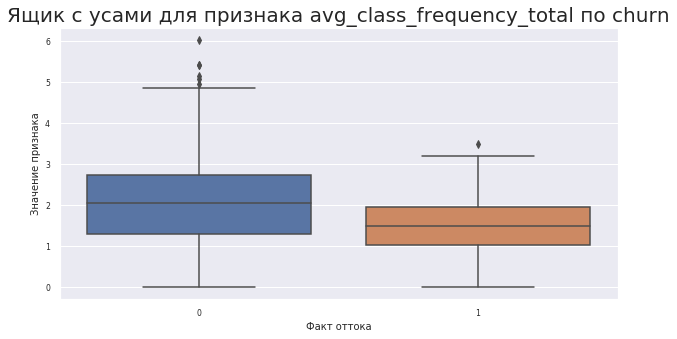

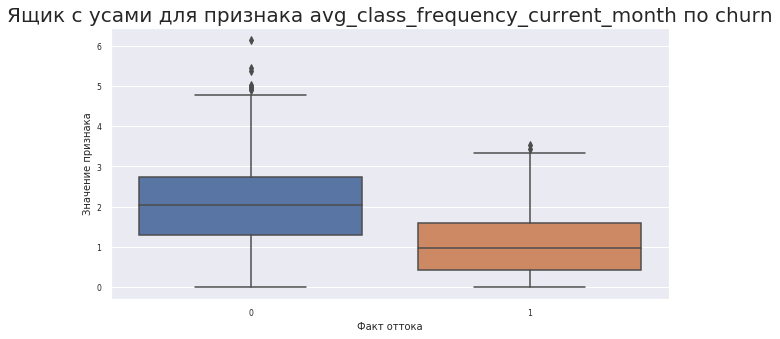

In [16]:
for col in ['avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    # Размер графика
    plt.figure(figsize=(10, 5))
    # График
    sns.boxplot(x = 'churn', y = df[col], data = df)
    # Оформление 
    plt.title('Ящик с усами для признака ' + col + ' по churn',fontsize=20)
    plt.xlabel('Факт оттока', fontsize=10),
    plt.ylabel('Значение признака', fontsize=10)
    plt.show()    


Матрица корреляций 

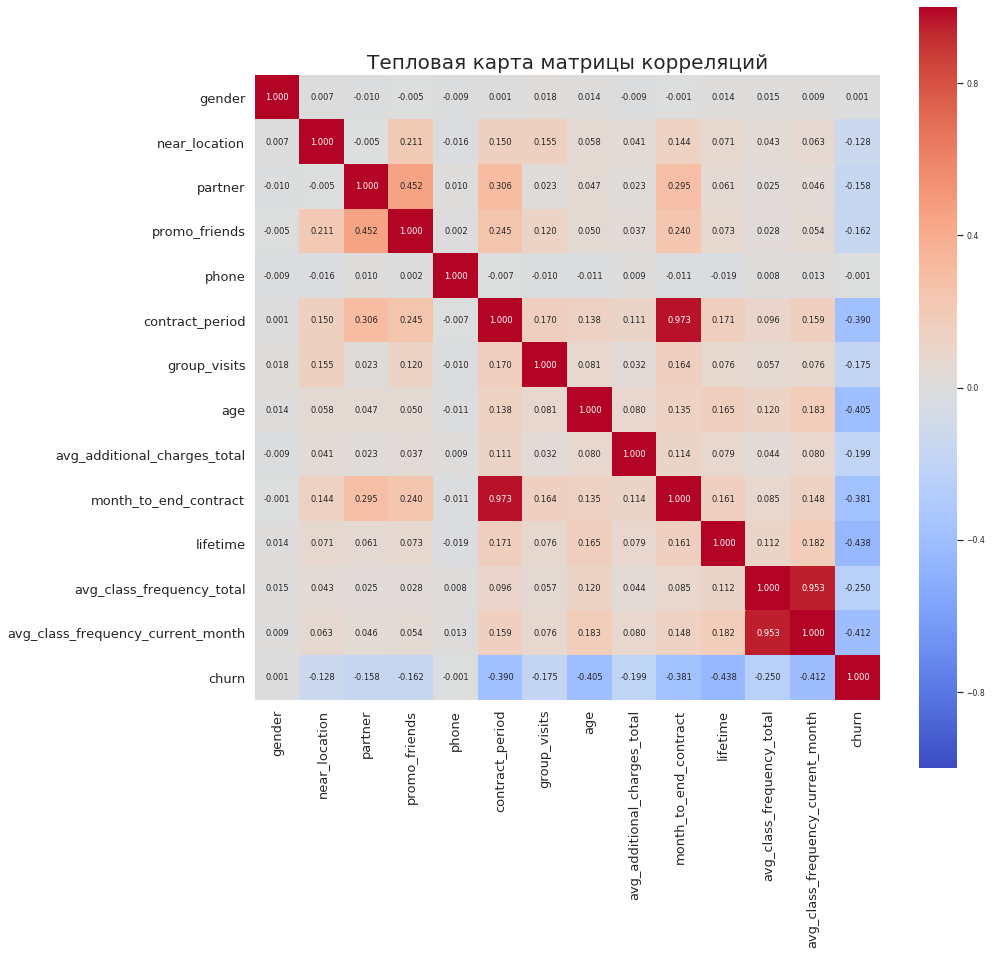

In [17]:
# Считаем матрицу корреляций
cm = df.corr()
# Размер
plt.figure(figsize=(14, 14))
# Тепловая карта, Задаем промежуток градиента цвета и цвет. гамму
sns.heatmap(cm, annot=True, fmt = '.3f', square=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm') 
# Оформление 
plt.title('Тепловая карта матрицы корреляций',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()

1. Высокая корреляция (0,973) между признаками month_to_end_contract и contract_period, а также avg_class_frequency_current_month и avg_class_frequency_total (коэф.корреляции = 0,953), что логично вытекает из содержания самих признаков
2. Модель логистической регрессии может быть чувствительна к корреляции признаков, поэтому, на мой взгляд, разумно, обучить модели на данных с этими признаками и без, и оставить тот вариант, где метрики будут выше

### Вывод
1. Можно предположить, что более молодые клиенты, клиенты тратящие меньшее кол-во денег на доп. услуги, уйдут с большей вероятностью

2. Клиенты в оттоке, в основном, покупают абономент на один месяц, а также посещают зал от 1 до 2 раз в неделю
3. Высокая корреляция (0,973) между признаками month_to_end_contract и contract_period, а также avg_class_frequency_current_month и avg_class_frequency_total (коэф.корреляции = 0,953), что логично вытекает из содержания самих признаков

## Модель прогнозирования оттока клиентов

In [5]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('churn', axis = 1)
y = df['churn']
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# стандартизируем данные 
scaler = StandardScaler()
scaler.fit(X_train)# обучите scaler на обучающей выборке методом fit
X_train_st =scaler.transform(X_train)# стандартизируйте обучающую выборку методом transform scaler 
X_test_st = scaler.transform(X_test)# стандартизируйте тестовую выборку методом transform scaler

In [20]:
# Напишем функцию вывода метрик (доп. посмотрим на f1 и ROC-AUC)
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [21]:
# Создадим модель (зафиксируем random_state, а также укажем class_weight, т.к. данные несбалансированны)
lr_model = LogisticRegression(random_state = 0, class_weight='balanced')
# Обучим модель
lr_model.fit(X_train_st, y_train)
# Сделаем предсказания на тестовой выборке
lr_predictions = lr_model.predict(X_test_st)
# посмотрим на вероятн. предсказаний модели
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# выведим метрики
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.91
	Precision: 0.76
	Recall: 0.91
	F1: 0.83
	ROC_AUC: 0.97


* Доля правильных ответов (Accuracy) - 91%, 
* Precision (т.е доля объектов действительно принадлежащих данному классу (положительному, 1) относительно всех объектов которые система отнесла к этому классу) - 76%
* Recall (доля объектов, реально относящихся к положительному классу, которые мы предсказали верно) - 91%
* F1 - учитывает баланс между метриками precision и recall - 0.83
* ROC_AUC ("я так понимаю, что можно сказать, общее кач-во модели") - 0,97, что близко к единице, и это высоке кач-во модели

Я думаю, при сравнение моделей, стоит уделить особое внимание метрики recall, так как согласно поставленным целям работы, нам нужно разработать рекомендации по повышению качества работы с клиентами и не «пропустить» клиента, который может потенциально уйти

Попробуем подобрать оптимальные параметры модели с помощью GridSearchCV

In [22]:
parameters_grid_lr = {'C':  np.logspace(-4,4,num=10,base=10)}

In [23]:
grid_cv_lr = GridSearchCV(lr_model, parameters_grid_lr, scoring = 'roc_auc')
grid_cv_lr.fit(X_train_st, y_train)
grid_cv_lr.best_estimator_

LogisticRegression(C=2.782559402207126, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# Создадим модель c оптим. параметрами
lr_model = grid_cv_lr.best_estimator_
# Обучим модель
lr_model.fit(X_train_st, y_train)
# Сделаем предсказания на тестовой выборке
lr_predictions = lr_model.predict(X_test_st)
# посмотрим на вероятн. предсказаний модели
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# выведим метрики
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии с подбором парам-в:')

Метрики для модели логистической регрессии с подбором парам-в:
	Accuracy: 0.91
	Precision: 0.76
	Recall: 0.90
	F1: 0.82
	ROC_AUC: 0.97


С параметрами по умолчанию метрики выше, возможно, если поперебирать дольше, то можно модель улучшить, хотя у нас и так качество модели достаточно высокое

Проделаем тоже самое с данными без коррелирующих признаков 

In [25]:
X_clean = df.drop(['churn', 'month_to_end_contract', 'avg_class_frequency_current_month'], axis = 1)

# разделяем модель на обучающую и валидационную выборку
X_train_clean, X_test_clean, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=0)
# стандартизируем данные 
scaler = StandardScaler()
scaler.fit(X_train_clean)# обучите scaler на обучающей выборке методом fit
X_train_clean_st = scaler.transform(X_train_clean)# стандартизируйте обучающую выборку методом transform scaler 
X_test_clean_st = scaler.transform(X_test_clean)# стандартизируйте тестовую выборку методом transform scaler

In [26]:
lr_model_clean = LogisticRegression(random_state = 0, class_weight='balanced')
lr_model_clean.fit(X_train_clean_st, y_train)
lr_predictions_clean = lr_model_clean.predict(X_test_clean_st)
lr_probabilities_clean = lr_model_clean.predict_proba(X_test_clean_st)[:,1]
print_all_metrics(y_test, lr_predictions_clean, lr_probabilities_clean , 
                  title='Метрики для модели логистической регрессии без корр. признаков:')

Метрики для модели логистической регрессии без корр. признаков:
	Accuracy: 0.86
	Precision: 0.67
	Recall: 0.89
	F1: 0.76
	ROC_AUC: 0.95


In [27]:
parameters_grid_lr_clean = {'C':  np.logspace(-4,4,num=10,base=10)}

In [28]:
grid_cv_lr_clean = GridSearchCV(lr_model, parameters_grid_lr_clean, scoring = 'roc_auc')
grid_cv_lr_clean.fit(X_train_st, y_train)
grid_cv_lr_clean.best_estimator_

LogisticRegression(C=2.782559402207126, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
lr_model_clean = grid_cv_lr_clean.best_estimator_
lr_model_clean.fit(X_train_clean_st, y_train)
lr_predictions_clean = lr_model_clean.predict(X_test_clean_st)
lr_probabilities_clean = lr_model_clean.predict_proba(X_test_clean_st)[:,1]
print_all_metrics(y_test, lr_predictions_clean, lr_probabilities_clean , 
                  title='Метрики для модели логистической регрессии без корр. признаков с подбором парам-в:')

Метрики для модели логистической регрессии без корр. признаков с подбором парам-в:
	Accuracy: 0.87
	Precision: 0.68
	Recall: 0.89
	F1: 0.77
	ROC_AUC: 0.95


Без коррел. признаков качество модели - хуже

Теперь обучим модель случайным лесом

In [30]:
rf_model = RandomForestClassifier(random_state = 0, class_weight='balanced')
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.90
	Precision: 0.85
	Recall: 0.71
	F1: 0.77
	ROC_AUC: 0.95


Попробуем подобрать оптимальные параметры модели с помощью GridSearchCV

In [31]:
# Зададим значения параметров
parameters_grid = {
    'n_estimators'      : [10, 50, 100, 150,200],
    'max_depth'         : [None,3, 6, 9, 12, 15, 20]
}

In [32]:
# Будем отьирать по метрике recall
grid_cv = GridSearchCV(rf_model, parameters_grid, scoring = 'roc_auc')
grid_cv.fit(X_train_st, y_train)
grid_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [33]:
# обучим модель с этими параметрами
rf_model = grid_cv.best_estimator_
rf_model.fit(X_train_st, y_train) ### должна быть стандартизированная выборка
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.91
	Precision: 0.84
	Recall: 0.80
	F1: 0.82
	ROC_AUC: 0.97


Для сравнения: 


Метрики для модели логистической регрессии:
Accuracy: 0.91
Precision: 0.76
Recall: 0.91
F1: 0.83
ROC_AUC: 0.97


По recall лучше логистическая регрессия, однако, я думаю, что если «поподбирать» параметры  случайного леса, более тщательно и долго, то возможно улучшить модель, однако, обе модели, достаточно, хороши ROC-AUC – 0.97

Посмотрим на важность признаков:

In [34]:
# Лог. регрессия
log_reg = pd.DataFrame({'feature' : X_train.columns, 'coef' : lr_model.coef_[0]})
# Добавим столбец с модулем значений coef
log_reg['module_coef'] = abs(log_reg.coef)
# Отсортируем по убыванию по модулю
log_reg.sort_values(by='module_coef', ascending=False)

,feature,coef,module_coef
12,avg_class_frequency_current_month,-4.471372,4.471372
10,lifetime,-3.978338,3.978338
11,avg_class_frequency_total,3.300579,3.300579
7,age,-1.137871,1.137871
9,month_to_end_contract,-0.724071,0.724071
5,contract_period,-0.595460,0.595460
8,avg_additional_charges_total,-0.584991,0.584991
6,group_visits,-0.405030,0.405030
3,promo_friends,-0.287579,0.287579
2,partner,-0.113998,0.113998


In [35]:
# Посмотрим на важность признаков в сл. лес
fоrest_m= pd.DataFrame({'feature' : X_train.columns, 'importance' : rf_model.feature_importances_})
fоrest_m.sort_values(by='importance',ascending=False)

,feature,importance
10,lifetime,0.287094
12,avg_class_frequency_current_month,0.175793
11,avg_class_frequency_total,0.116364
7,age,0.110728
9,month_to_end_contract,0.088212
8,avg_additional_charges_total,0.083841
5,contract_period,0.077210
6,group_visits,0.014722
3,promo_friends,0.011030
2,partner,0.010917


### Вывод
1. В качестве приоритетной была выбрана метрика recall
2. По итогу сравнения - модель LogisticRegression лучше
3. Наиболее важными признаками являются: частота посещения, продолжительность занятий (в смысле с первого посещения в месяцах), а также возраст


## Кластеризация клиентов

In [7]:
# стандартизируем данные 
scaler = StandardScaler()
scaler.fit(X_train)# обучите scaler на обучающей выборке методом fit
X_train_st =scaler.transform(X_train)# стандартизируйте обучающую выборку методом transform scaler 
X_test_st = scaler.transform(X_test)

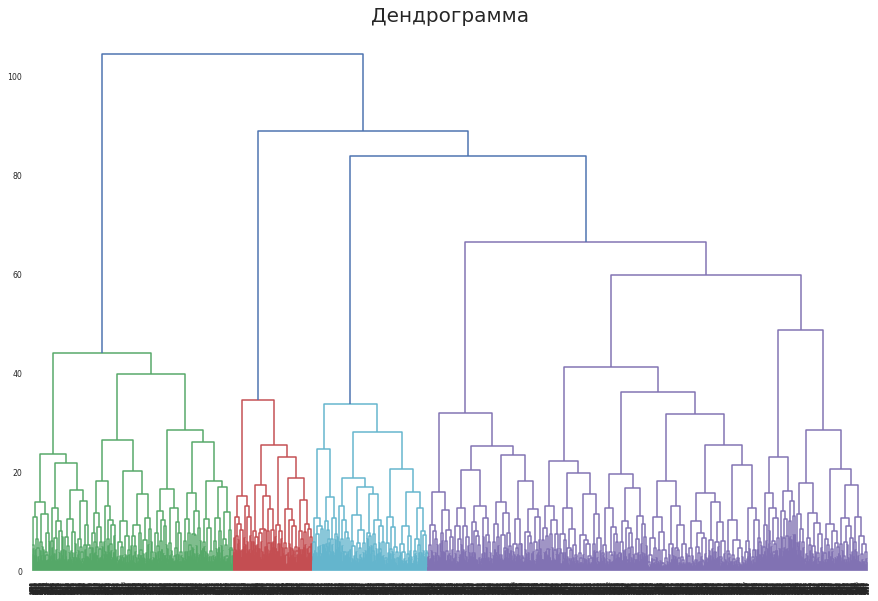

In [37]:
# Стандартизируем все признаки, кроме целевой переменной
x_sc = scaler.fit_transform(X)
# Матрица растояний
linked = linkage(x_sc, method = 'ward')
# Размер
plt.figure(figsize=(15, 10))  
dendrogram(linked,orientation='top')
# Оформление
plt.title('Дендрограмма',fontsize=20)
plt.show()

Судя по цвету - можно выделить 4 кластера.Можно  поперебирать кол-во кластеров (4,5,6) и взять с макс. Silhouette_score

In [9]:
# Создадим модель сначала с 5 кластерами 
km = KMeans(n_clusters = 5, random_state=0)
# применяем алгоритм к данным и формируем вектор кластеров
labels_5 = km.fit_predict(x_sc)  
# Посмотрим score, чем ближе к 1, тем лучше
print('Silhouette_score для 5 кластеров: {:.3f}'.format(silhouette_score(x_sc, labels_5)))

Silhouette_score для 5 кластеров: 0.141


In [39]:
# Сделаем тоже самое для 4 и 6 кластеров

km = KMeans(n_clusters = 4, random_state=0)
# применяем алгоритм к данным и формируем вектор кластеров
labels_4 = km.fit_predict(x_sc)  
# Посмотрим score, чем ближе к 1, тем лучше
print('Silhouette_score для 4 кластеров: {:.3f}'.format(silhouette_score(x_sc, labels_4)))
km = KMeans(n_clusters = 6, random_state=0)
# применяем алгоритм к данным и формируем вектор кластеров
labels_6 = km.fit_predict(x_sc)  
# Посмотрим score, чем ближе к 1, тем лучше
print('Silhouette_score для 6 кластеров: {:.3f}'.format(silhouette_score(x_sc, labels_6)))

Silhouette_score для 4 кластеров: 0.134
Silhouette_score для 6 кластеров: 0.135


Для 5 кластеров, оценка лучше всего


Посмотрим на средние значения признаков для кластеров


In [10]:
# Добавим столбец с кластерами
df['cluster'] = labels_5
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


In [41]:
# Напишем фун-ию подсветки макс. значений - синий цвет
def highlight_max(values):
    is_max = values.max()
    return ['background-color: blue' if i == is_max else '' for i in values]
# Напишем фун-ию подсветки мин. значений - зеленый цвет
def highlight_min2(values):
    is_min = values.min()
    return ['background-color: green' if i == is_min else '' for i in values]   

In [42]:
# Посмотрим на средние значения признаков
df.groupby('cluster').mean().style.apply(highlight_max, axis = 0).apply(highlight_min2, axis = 0)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1,10.8843,0.543027,29.9802,160.707,9.95054,4.73887,1.9833,1.97623,0.0276954
1,0.522078,0.862338,0.47013,0.306494,0,4.78701,0.425974,29.3013,143.958,4.47532,3.92468,1.84722,1.71637,0.267532
2,0.49505,0,0.463366,0.0792079,1,2.35248,0.215842,28.4772,135.458,2.19802,2.8099,1.66046,1.47732,0.443564
3,0.485737,1,0.350238,0.240095,1,1.94849,0.341521,28.168,131.622,1.85658,2.44057,1.24763,1.01298,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.66547,0.473118,30.1278,161.724,2.4552,4.89606,2.85153,2.84947,0.0681004


1. Первый кластер (0) - самая низкая доля оттока, самый высокая активность (promo_friends,group_visits), самая высокая доля партнеров компании, а также средняя прод-ть контракта
2. Второй (1) - средняя доля оттока, имеют не самые низкие и не самые высокие значения признаков, не оставляют контакт. телефон
3. Третий (2) - доля оттока уже выше, клиенты - живут далеко от фитнес центра, а также имеют низкую активность (promo_friends, group_visits)
4. Четвертый - доля оттока максимальна, у клиентов самый низкий средний возраст, период контракта, посещаемость и доход, кот. они приносят компании
5. Пятый - низкая доля оттока (второе место), эти клиенты приносят самый высокий доход, вместе с первым кластером - это постоянные клиенты



Построим распределения признаков для кластеров.

Для сравнения удобен график box plot, либо violinplot, на нем еще будет отражена форма распределения 
Для визуализации бинарных признаков используем countplot, т.к. там будет бинарное распределение

In [43]:
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn', 'cluster'],
      dtype='object')

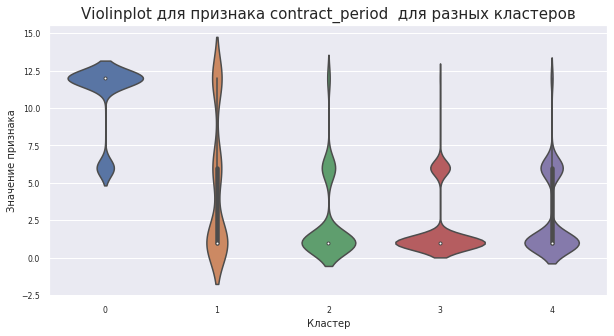

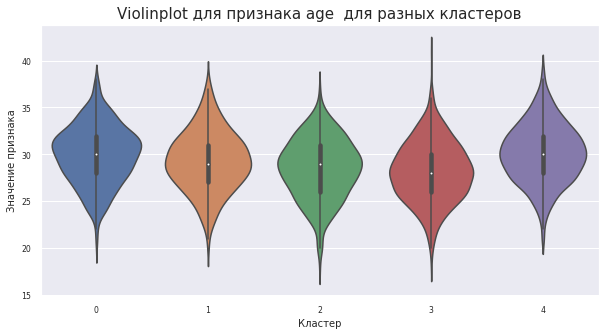

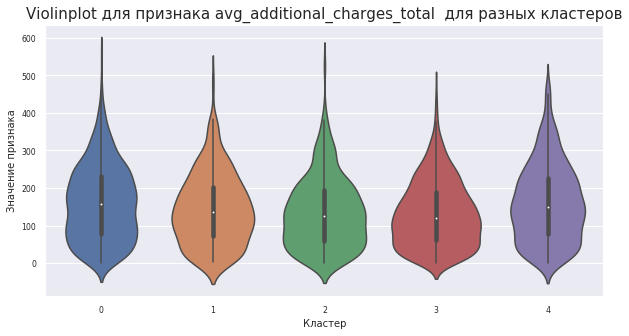

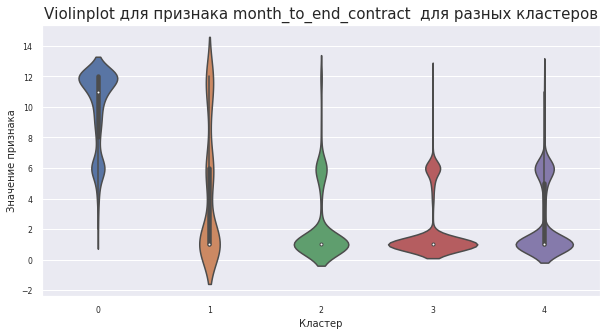

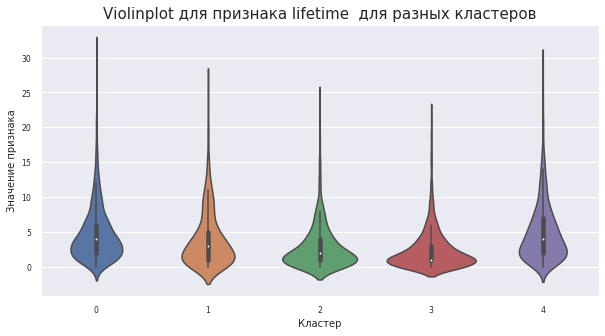

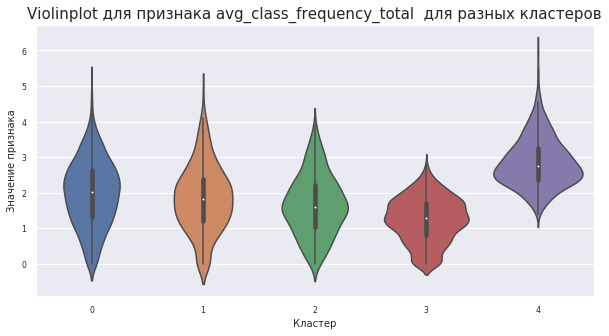

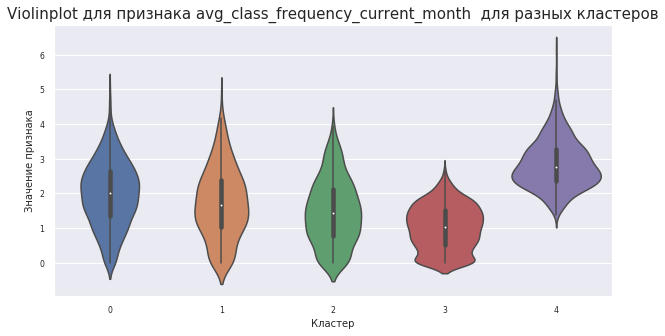

In [44]:
# Перебираем небинарные признаки
for col in ['contract_period','age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    # Размер
    plt.figure(figsize=(10, 5))
    # График
    sns.violinplot(x = 'cluster', y = df[col], data = df)
    # Оформление
    plt.title('Violinplot для признака ' + col + '  для разных кластеров',fontsize=15)
    plt.xlabel('Кластер', fontsize=10),
    plt.ylabel('Значение признака', fontsize=10)
    plt.show()

1. Для 0 кластера - основная часть клиентов имеет контракт на 12 месяцев
2. Возраст примерно одинаков, в 0 и 4 - он в среднем чуть выше
3. В целом можно повторить все выводы сделанные раннее

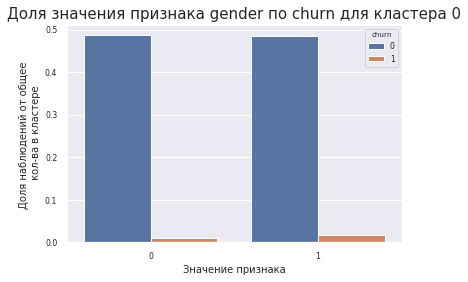

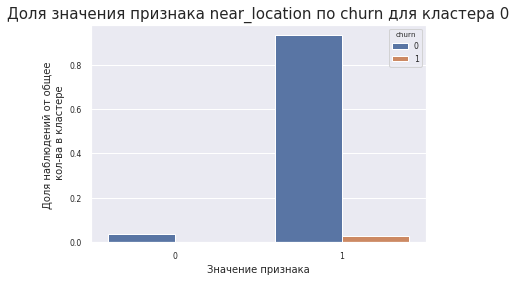

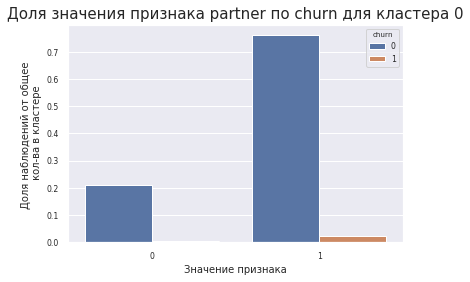

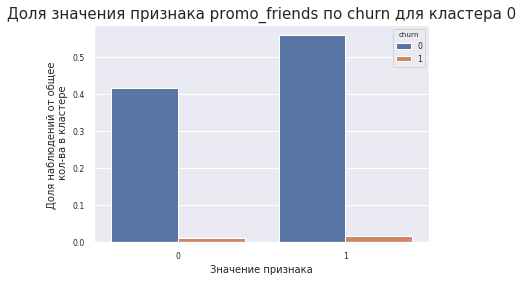

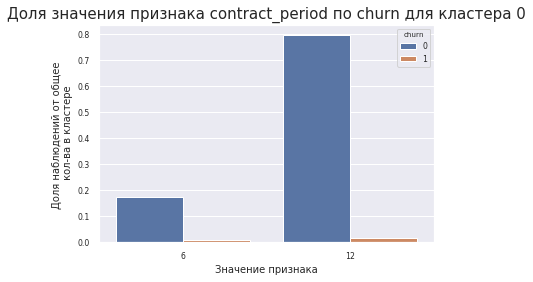

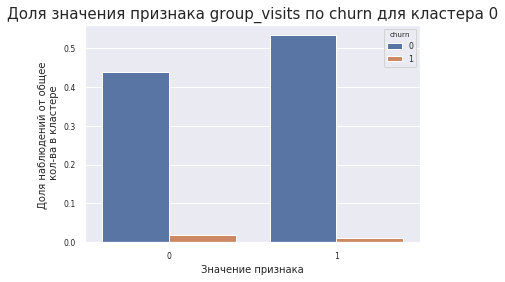

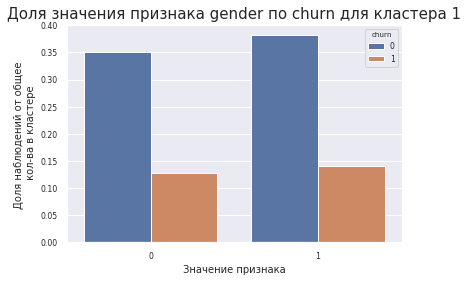

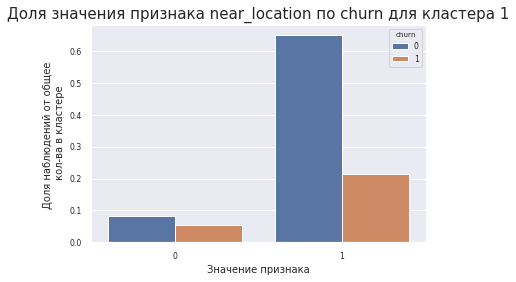

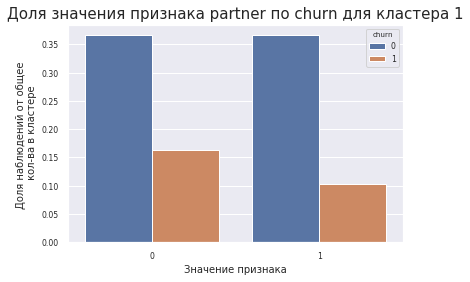

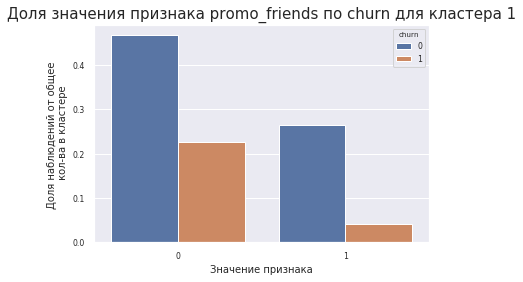

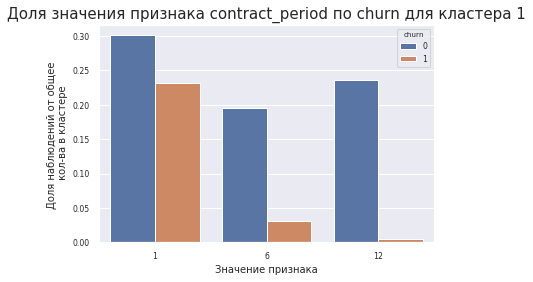

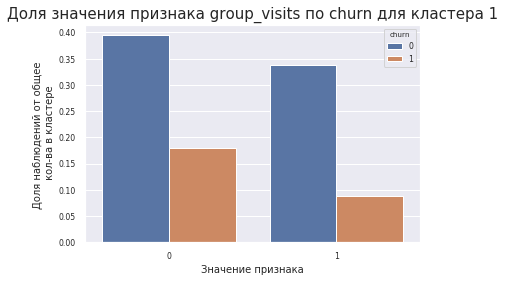

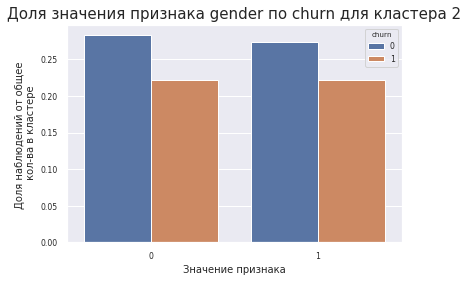

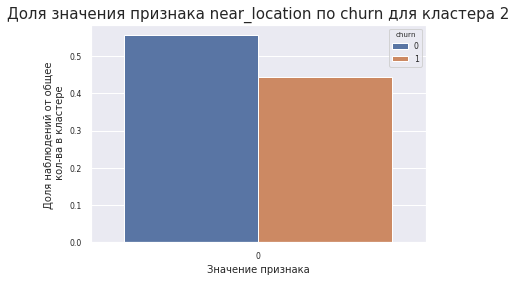

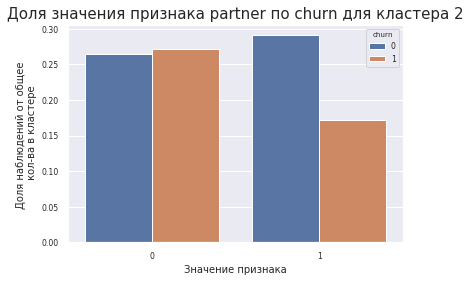

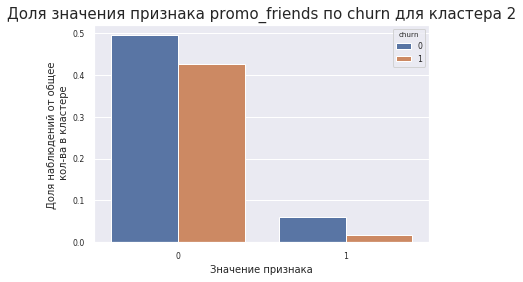

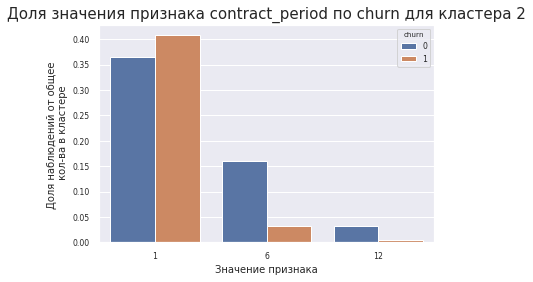

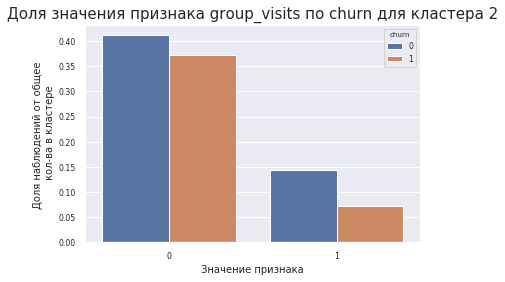

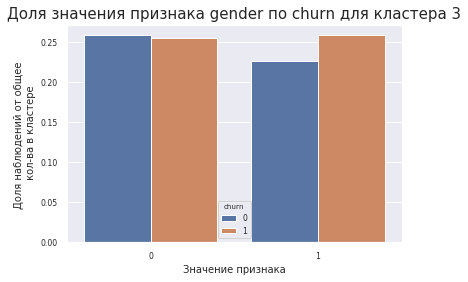

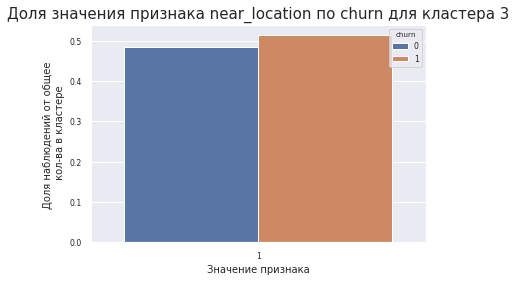

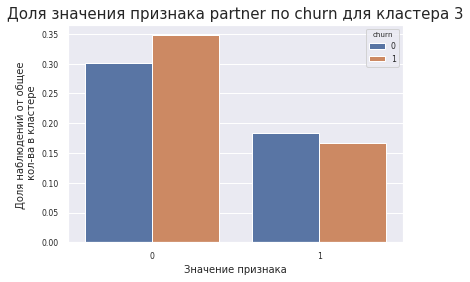

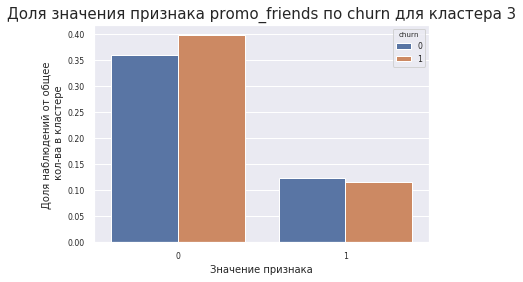

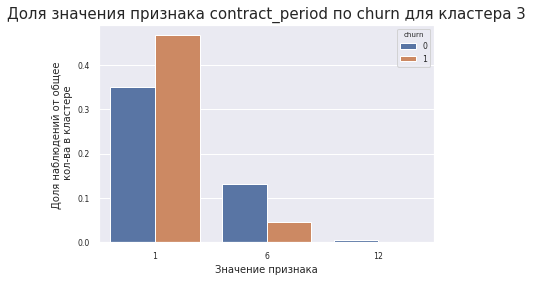

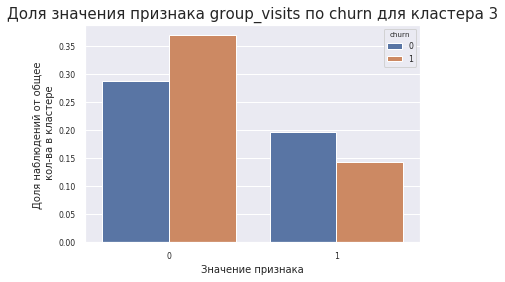

In [45]:
# перебераем кластеры
for i in range(4):
    #перебераем столбцы
    for col in ['gender', 'near_location', 'partner', 'promo_friends',
       'contract_period', 'group_visits']:
        # срез по кластеру
        df_clust = df.query('cluster==@i')
        # кол-во наблюдений для кажого значения признака для каждого значения целевой перем-й
        df_clust_count = df_clust.groupby(['churn',col]).agg({col: 'count'})
        df_clust_count.columns = ['feature_count']
        df_clust_count = df_clust_count.reset_index()
        # в Y делим кол-во наблюдений по признакам на общее кол-во наблюдений в кластере
        sns.barplot(x=df_clust_count[col], y=df_clust_count['feature_count']/len(df_clust), hue=df_clust_count.churn)
        
        # Оформление
        plt.title('Доля значения признака ' + col + ' по churn' + ' для кластера' + ' ' + str(i) ,fontsize=15)
        plt.xlabel('Значение признака', fontsize=10),
        plt.ylabel('Доля наблюдений от общее \n кол-ва в кластере', fontsize=10)
        plt.show()

1. Пол - особо не влияет на факт оттока во всех кластерах
2. Если клиент живет далеко, то вероятность оттока выше
3. Интересно, что для кластера (0), большинство клиентов, которые ушли, были  сотрудниками компании-партнёра клуба, это, вероятно, можно объяснить тем, что в этом кластере доля таких клиентов максимальна



Для каждого полученного кластера посчитаем долю оттока 

In [46]:
df.groupby('cluster').agg({'churn': 'mean'}).sort_values(by='churn')

,churn
cluster,
0,0.027695
4,0.068100
1,0.267532
2,0.443564
3,0.514263


* Кластер 2 и 3 - склонны к оттоку
* Кластер 4 и 0 - надежны

## Общий вывод

 В результате исследования была построена модель для предсказания оттока клиентов и выделены следующие кластеры клиентов:
 
* Первый кластер - самая низкая доля оттока, самый высокая активность (promo_friends,group_visits), самая высокая доля партнеров компании, а также средняя прод-ть контракта - это надежный кластер
* Второй - средняя доля оттока, имеют не самые низкие и не самые высокие значения признаков, не оставляют контакт. телефон
* Третий - доля оттока уже выше, клиенты - живут далеко от фитнес центра, а также имеют низкую активность (promo_friends, group_visits) - клиент склонен к оттоку
* Четвертый - доля оттока максимальна, у клиентов самый низкий средний возраст, период контракта, посещаемость и доход, кот. они приносят компании, клиент склонен к оттоку
* Пятый - низкая доля оттока (второе место), эти клиенты приносят самый высокий доход, вместе с первым кластером - это постоянные клиенты - это надежный кластер

Т.е. ключевыми являются признаки: длительность контракта, частота посещений, активность(т.е. посещение групповых занятий, посещение вместе с друзьями).

Таким образом, в качестве рекомендаций, можно предложить, провести  стимулирующие маркетинговые акции: например, скидки при покупке годового абонемента или (и) скидки мотивирующие к регулярному посещению центра, скидочная программа для друзей, для групповых занятий и т.д.
